In [2]:
 !git clone https://github.com/librosa/data.git /sample_data

Cloning into '/sample_data'...
remote: Enumerating objects: 125, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 125 (delta 40), reused 106 (delta 25), pack-reused 0
Receiving objects: 100% (125/125), 14.78 MiB | 9.10 MiB/s, done.
Resolving deltas: 100% (40/40), done.


In [5]:
import os

os.environ['LIBROSA_DATA_DIR'] = '/sample_data'

import librosa

librosa.util.list_examples()
librosa.example('libri1')

samples, sample_rate = librosa.load(librosa.example('libri1'), sr=None)

AVAILABLE EXAMPLES
--------------------------------------------------------------------
brahms    	Brahms - Hungarian Dance #5
choice    	Admiral Bob - Choice (drum+bass)
fishin    	Karissa Hobbs - Let's Go Fishin'
humpback  	Glacier Bay 60-second clip humpback whale song November 2020
libri1    	Ashiel Mystery - A Detective Story, chapter 2, narrated by Garth Comira
libri2    	The Age of Chivalry / Chapter 18: Perceval / Read by Anders Lankford
libri3    	Sense and Sensibility / Chapter 18 / Jane Austen / Read by Heather Barnett
nutcracker	Tchaikovsky - Dance of the Sugar Plum Fairy
pistachio 	The Piano Lady - Pistachio Ice Cream Ragtime
robin     	Bird Whistling, Robin, Single, 13.wav / InspectorJ
sweetwaltz	Setuniman - Sweet Waltz
trumpet   	Mihai Sorohan - Trumpet loop
vibeace   	Kevin MacLeod - Vibe Ace


(327222,)

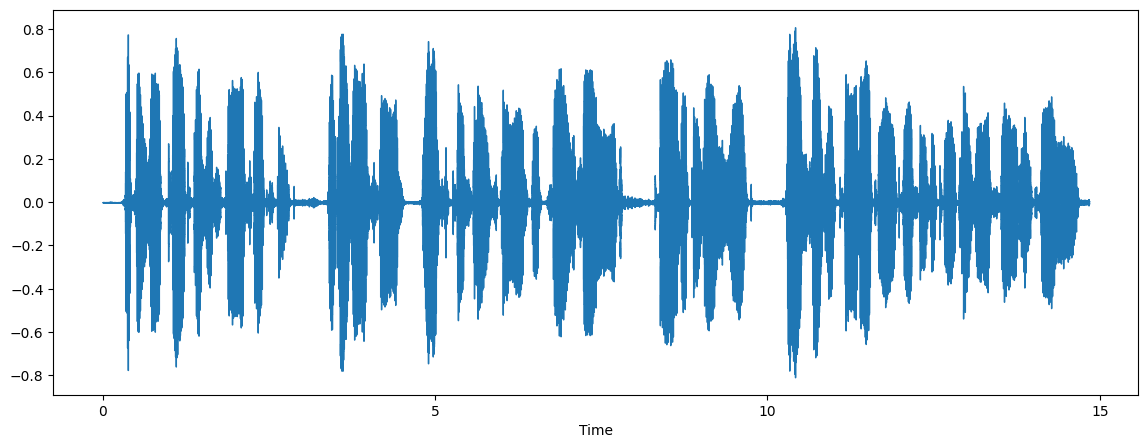

In [9]:
import librosa.display
import matplotlib.pyplot as plt


plt.figure(figsize=(14,5))
librosa.display.waveshow(samples, sr=sample_rate)

In [10]:
from IPython.display import Audio
Audio(librosa.example('libri1'))

In [11]:
print('Example shape ', samples.shape, 'Sample rate ', sample_rate, 'Data type', type(samples))
print(samples[327200:327222])

Example shape  (327222,) Sample rate  22050 Data type <class 'numpy.ndarray'>
[-4.5896471e-03 -3.7569706e-03 -3.4421170e-03 -3.2126876e-03
 -2.6973248e-03 -1.8337956e-03 -5.2360463e-04  3.3769500e-04
 -2.6049966e-05 -6.1467162e-04 -1.0312656e-03 -3.1107850e-03
 -6.4258021e-03 -7.8861527e-03 -7.5903423e-03 -7.8028287e-03
 -7.2774589e-03 -4.6033086e-03 -1.3417070e-03  1.0174322e-03
  2.3917034e-03  2.0072157e-03]


<ipython-input-12-f33e70e4de29>:2: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(sgram)


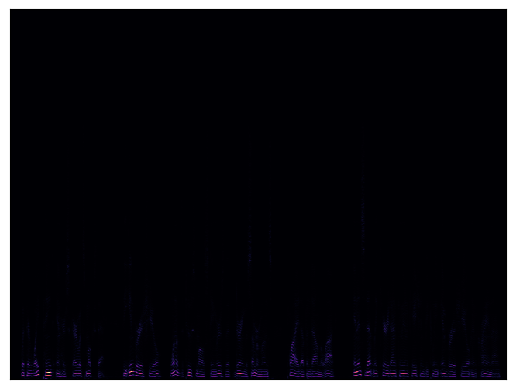

In [12]:
sgram = librosa.stft(samples)
librosa.display.specshow(sgram)

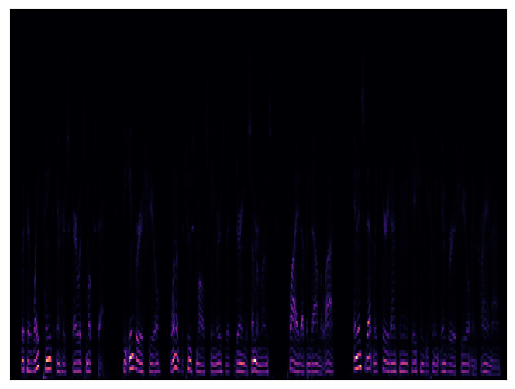

In [14]:
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram)

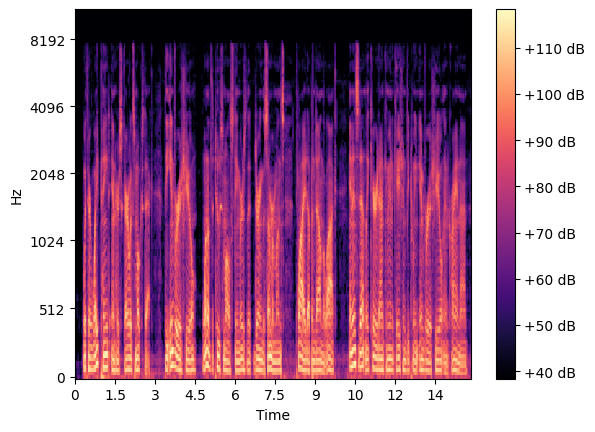

In [16]:
import numpy as np
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


MFCC is of type <class 'numpy.ndarray'> with shape (20, 640)


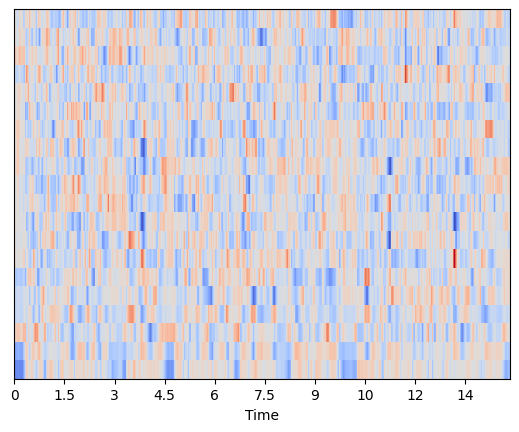

In [18]:
import sklearn
import librosa
import librosa.display


samples, sample_rate = librosa.load(librosa.example('libri1'), sr=None)

mfcc = librosa.feature.mfcc(y=samples, sr=sample_rate)

mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time')

print(f'MFCC is of type {type(mfcc)} with shape {mfcc.shape}')
